In [8]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

from astropy.table import Table
from astropy.table import join

mpl.rcParams["figure.dpi"] = 100

import pandas as pd

data = pd.read_csv('~/Desktop/lvm-test-data.csv')
data.head()

,bf18_[C/H],bf18_[N/H],bf18_[O/H],bf18_[Na/H],bf18_[Mg/H],bf18_[Al/H],bf18_[Si/H],bf18_[Ca/H],bf18_[Ti/H],bf18_[V/H],bf18_[Cr/H],bf18_[Mn/H],bf18_[Fe/H],bf18_[Ni/H],bf18_[Y/H],p20_cks_steff,p20_cks_slogg,p20_cks_smet,p20_cks_svsini,p20_iso_sage
0,-0.00,-0.02,0.08,-0.04,0.03,0.01,-0.01,0.04,0.04,0.02,0.06,0.04,0.03,0.01,0.09,5538.9,4.443,0.102,0.8,7.943282
1,0.08,-0.24,0.09,0.01,0.07,0.12,0.12,0.15,0.15,0.07,0.17,-0.04,0.12,0.07,0.09,5660.3,4.258,0.177,2.6,9.120108
2,0.32,-0.44,0.48,-0.03,-0.04,-0.07,0.01,0.06,0.09,-0.01,0.11,0.04,0.04,-0.03,0.38,5001.6,4.678,0.062,2.1,5.888437
3,-0.00,0.05,-0.03,-0.11,-0.04,-0.12,0.00,0.03,0.00,-0.03,-0.02,-0.07,-0.01,-0.08,0.10,5818.8,4.400,0.012,1.3,5.623413
4,0.01,0.29,0.35,0.02,0.10,0.13,0.19,0.35,0.28,0.07,0.24,-0.11,0.24,0.13,0.51,6448.7,4.134,0.203,5.2,2.264644


In [9]:
errors = pd.read_csv('~/Desktop/lvm-test-errors.csv')
errors.head()

,bf18_e_[C/H],bf18_e_[N/H],bf18_e_[O/H],bf18_e_[Na/H],bf18_e_[Mg/H],bf18_e_[Al/H],bf18_e_[Si/H],bf18_e_[Ca/H],bf18_e_[Ti/H],bf18_e_[V/H],bf18_e_[Cr/H],bf18_e_[Mn/H],bf18_e_[Fe/H],bf18_e_[Ni/H],bf18_e_[Y/H],p20_cks_steff_err1,p20_cks_slogg_err1,p20_cks_smet_err1,p20_cks_svsini_err1,p20_iso_sage_err1
0,0.04,0.11,0.08,0.04,0.03,0.06,0.03,0.03,0.03,0.05,0.02,0.04,0.02,0.02,0.05,60.0,0.1,0.04,1.0,3.371801
1,0.05,0.14,0.10,0.06,0.04,0.07,0.04,0.04,0.04,0.06,0.03,0.05,0.03,0.03,0.07,60.0,0.1,0.04,1.0,1.794833
2,0.05,0.13,0.09,0.05,0.03,0.07,0.03,0.04,0.03,0.06,0.03,0.05,0.02,0.03,0.06,60.0,0.1,0.04,1.0,5.624011
3,0.03,0.08,0.06,0.03,0.02,0.04,0.02,0.03,0.02,0.04,0.02,0.03,0.02,0.02,0.04,60.0,0.1,0.04,1.0,2.041346
4,0.03,0.06,0.05,0.02,0.02,0.04,0.02,0.02,0.02,0.04,0.02,0.03,0.01,0.02,0.04,60.0,0.1,0.04,1.0,0.380487


In [10]:
print(np.shape(data))
print(np.shape(errors))

(928, 20)
(928, 20)


In [11]:
Y = np.array(data)
Yerr = np.array(errors)

In [12]:
from sklearn.decomposition import FactorAnalysis, PCA
from sklearn.preprocessing import StandardScaler

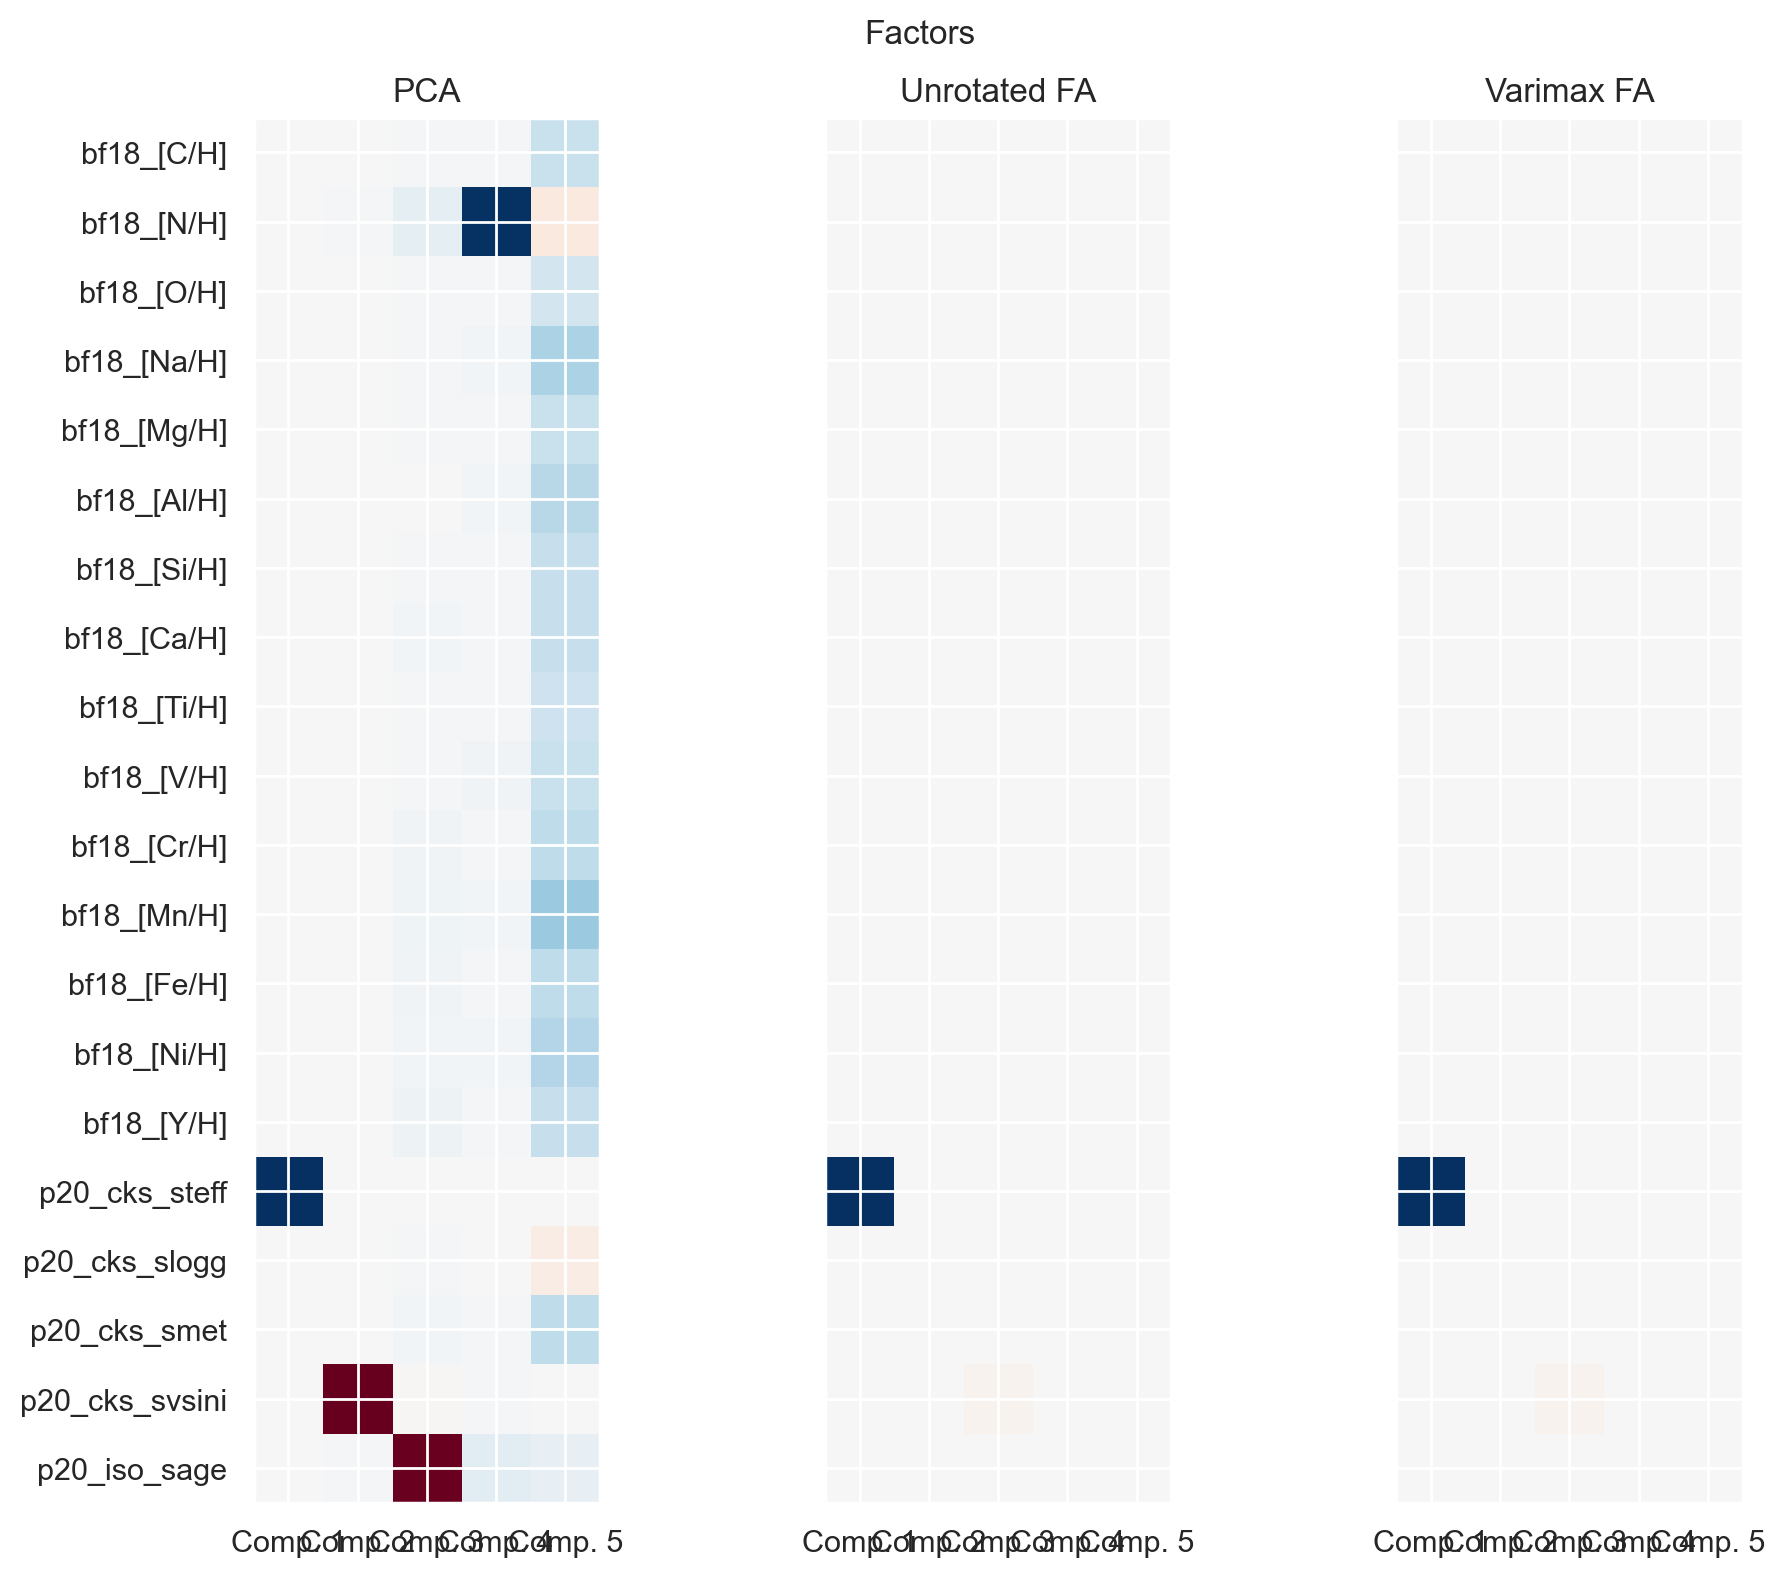

In [16]:
n_comps = 5

feature_names = list(data.columns)

methods = [
    ("PCA", PCA()),
    ("Unrotated FA", FactorAnalysis()),
    ("Varimax FA", FactorAnalysis(rotation="varimax")),
]

fig, axes = plt.subplots(ncols=len(methods), figsize=(10, 8))

for ax, (method, fa) in zip(axes, methods):
    fa.set_params(n_components=n_comps)
    fa.fit(Y)
    
    components = fa.components_.T
    #print("\n\n %s :\n" % method)
    #print(np.shape(components))
    #print(components)

    vmax = np.abs(components).max()
    ax.imshow(components, cmap="RdBu_r", vmax=vmax, vmin=-vmax)
    ax.set_yticks(np.arange(len(feature_names)))
    if ax.is_first_col():
        ax.set_yticklabels(feature_names)
    else:
        ax.set_yticklabels([])
    ax.set_title(str(method))
    ax.set_xticks([0, 1, 2, 3, 4])
    ax.set_xticklabels(["Comp. 1", "Comp. 2", "Comp. 3", "Comp. 4", "Comp. 5"])
fig.suptitle("Factors")
plt.tight_layout()
plt.show()

In [17]:
from warnings import filterwarnings
#from aesara import tensor as at
import aesara_theano_fallback.tensor as at
import arviz as az
from matplotlib import pyplot as plt
import numpy as np
import pymc3 as pm
import pymc3_ext as pmx
import seaborn as sns

filterwarnings('ignore', category=RuntimeWarning, module='arviz')
filterwarnings('ignore', category=UserWarning, module='arviz')
filterwarnings('ignore', category=UserWarning, module='pandas')

plt.rcParams['figure.figsize'] = (8, 6)
sns.set(color_codes=True)

In [18]:
N = np.shape(Y)[0]     # size of sample
M = np.shape(Y)[1]     # dimensionality of observed targets
F = 5                  # number of latent factors that govern the covariance structure

with pm.Model() as factor_model:
    
    mean = pm.Normal("mean", mu=0., sigma=5., shape=M, testval=np.mean(Y, axis=0))
    σ = pm.HalfNormal("σ", 2.5)
    
    # Non-diagonal correlation structure to the noise
    w = pm.Normal("w", 0., 10., shape=(M, F), testval=components)
    z = pm.Normal("z", 0., 10., shape=(N, F))
    
    obs = pm.Normal("obs", mean + z.dot(w.T), σ, observed=Y)    
    
    # Optimize to find the maximum a posteriori parameters
    map_soln = pmx.optimize()

KeyboardInterrupt: 